<a href="https://colab.research.google.com/github/TharinduGee/Prediction_Models/blob/main/Carbon_Emission_Predictor_Full_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction model of the carbon emmision of vehicle by their model data 
we can use data of US envirionment protecting agency to this project
First we should fetch data from link https://www.epa.gov/system/files/documents/2022-04/22-tstcar-2022-04-15.xlsx

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import tensorflow as tf;

In [2]:
record = pd.read_excel('https://www.epa.gov/system/files/documents/2022-04/22-tstcar-2022-04-15.xlsx');

In [3]:
record = record.dropna(thresh = 3000, axis='columns')
record = record.fillna(method= 'ffill',axis='rows')

In [4]:

train_record = record.sample(frac = 0.8, random_state = 3)
test_record = record.drop(train_record.index)


In [5]:
numeric_feature_names = []
categorical_feature_names = []
for name in record.columns:
  if record[name].dtype != object:
    numeric_feature_names.append(name)
  else:
    categorical_feature_names.append(name)

numeric_feature_names

['Model Year',
 'Test Veh Configuration #',
 'Test Veh Displacement (L)',
 'Rated Horsepower',
 '# of Cylinders and Rotors',
 '# of Gears',
 'Transmission Overdrive Code',
 'Equivalent Test Weight (lbs.)',
 'Axle Ratio',
 'N/V Ratio',
 'Shift Indicator Light Use Cd',
 'Test Procedure Cd',
 'Test Fuel Type Cd',
 'THC (g/mi)',
 'CO (g/mi)',
 'CO2 (g/mi)',
 'NOx (g/mi)',
 'CH4 (g/mi)',
 'RND_ADJ_FE',
 'DT-Inertia Work Ratio Rating',
 'DT-Absolute Speed Change Ratg',
 'DT-Energy Economy Rating',
 'Target Coef A (lbf)',
 'Target Coef B (lbf/mph)',
 'Target Coef C (lbf/mph**2)',
 'Set Coef A (lbf)',
 'Set Coef B (lbf/mph)',
 'Set Coef C (lbf/mph**2)']

In [7]:
train_numeric_features = train_record[numeric_feature_names]
test_numeric_features = test_record[numeric_feature_names]
train_categorical_features = train_record[categorical_feature_names]
test_categorical_features = test_record[categorical_feature_names]

In [ ]:
train_target = train_numeric_features.pop("CO2 (g/mi)")
test_target = test_numeric_features.pop("CO2 (g/mi)")
train_numeric_features.head()

In [13]:
for name in categorical_feature_names:
  vocab = sorted(set(train_categorical_features[name]))
  print(f'name: {name}')
  print(f'vocab: {vocab}\n')

  if type(vocab[0]) is str:
    lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
  else:
    lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

  #x = inputs[name][:, tf.newaxis]
  x = lookup(train_categorical_features[name])
  #preprocessed.append(x)

name: Vehicle Manufacturer Name
vocab: ['BMW', 'FCA US LLC', 'FOMOCO', 'Ferrari', 'GM', 'Honda', 'Hyundai', 'Jaguar Land Rover L', 'Karma Automotive, L', 'Kia', 'Lucid USA, Inc', 'MAZDA', 'Maserati', 'McLaren Automotive ', 'Mercedes-Benz', 'Mitsubishi Motors Co', 'Nissan', 'Porsche', 'Rivian Automotive L', 'Rolls-Royce', 'Subaru', 'Tesla', 'Toyota', 'Volkswagen Group of', 'Volvo', 'aston martin']

name: Veh Mfr Code
vocab: ['ASX', 'BMX', 'CRX', 'FEX', 'FJX', 'FMX', 'GMX', 'HNX', 'HYX', 'JLX', 'KAL', 'KMX', 'LMU', 'MAX', 'MBX', 'MLN', 'MTX', 'NSX', 'PRX', 'RIV', 'RRG', 'TKX', 'TSL', 'TYX', 'VGA', 'VVX']

name: Represented Test Veh Make
vocab: ['2022', 'ACURA', 'AUDI', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BENTLEY', 'BMW', 'BMX', 'BUGATTI', 'BUICK', 'Bentley', 'CADILLAC', 'CHEVROLET', 'Chrysler', 'Dodge', 'Ferrari', 'Fiat', 'Ford', 'GMC', 'Genesis', 'HONDA', 'HYUNDAI', 'Honda', 'Hyundai', 'INFINITI', 'Jaguar', 'Jeep', 'KIA', 'Karma', 'Kia', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'Lamborg

Now, we should split data to the train and test.:

In [ ]:
target = new_record.pop("CO2 (g/mi)")
train_data = new_record.iloc[:3000,:]
test_data =  new_record.iloc[3000:, :]
target = target.fillna(method = 'ffill', axis = 'rows')
new_record

,Vehicle Manufacturer Name,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Tested Transmission Type,# of Gears,Test Procedure Cd
0,aston martin,Car,503,8.0,Semi-Automatic,8,21
1,aston martin,Car,503,8.0,Semi-Automatic,8,3
2,aston martin,Car,715,12.0,Semi-Automatic,8,21
3,aston martin,Car,715,12.0,Semi-Automatic,8,3
4,aston martin,Both,550,8.0,Automatic,9,21
...,...,...,...,...,...,...,...
4392,Volvo,Both,312,4.0,Semi-Automatic,8,31
4393,Volvo,Both,312,4.0,Semi-Automatic,8,81
4394,Volvo,Both,312,4.0,Semi-Automatic,8,84
4395,Volvo,Both,312,4.0,Semi-Automatic,8,21


Now, we have to choose suitable algorithm for train data and train data.

In [ ]:
numerical_features_names = ["Rated Horsepower","# of Cylinders and Rotors","# of Gears","Test Procedure Cd" ]
categorical_features_names = ["Vehicle Manufacturer Name","Vehicle Type","Tested Transmission Type"]

inputs = {}

for name, column in new_record.items():
  if type(column[0]) == str:
    dtype = tf.string
  elif (name in categorical_features_names):
    dtype = tf.int64
  else:
    dtype = tf.float32


  inputs[name] = tf.keras.Input(shape=(), name=name, dtype=dtype)

inputs


{'# of Cylinders and Rotors': <KerasTensor: shape=(None,) dtype=float32 (created by layer '# of Cylinders and Rotors')>,
 '# of Gears': <KerasTensor: shape=(None,) dtype=float32 (created by layer '# of Gears')>,
 'Rated Horsepower': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'Rated Horsepower')>,
 'Test Procedure Cd': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'Test Procedure Cd')>,
 'Tested Transmission Type': <KerasTensor: shape=(None,) dtype=string (created by layer 'Tested Transmission Type')>,
 'Vehicle Manufacturer Name': <KerasTensor: shape=(None,) dtype=string (created by layer 'Vehicle Manufacturer Name')>,
 'Vehicle Type': <KerasTensor: shape=(None,) dtype=string (created by layer 'Vehicle Type')>}

In [ ]:
def stack_dict(inputs, fun=tf.stack):
    values = []
    for key in sorted(inputs.keys()):
      values.append(tf.cast(inputs[key], tf.float32))

    return fun(values, axis=-1)

numerical_features = new_record[numerical_features_names]
Normalizer = tf.keras.layers.Normalization(axis=1)
Normalizer.adapt(stack_dict(dict(numerical_features)))




In [ ]:
numeric_inputs = {}
preprocessed = []

for name in numerical_features_names:
  numeric_inputs[name] = inputs[name]

numeric_inputs = stack_dict(numeric_inputs)
numeric_normalized = Normalizer(numeric_inputs)

preprocessed.append(numeric_normalized)

preprocessed

[<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization')>]

In [ ]:
for name in categorical_features_names:
  vocab = sorted(set(new_record[name]))
  print("name : {}".format(name))
  print("vocab : {}".format(vocab))

  if type(vocab[0]) is str:
    lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
  else:
    lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')
  

  x = inputs[name][:,tf.newaxis]
  x = lookup(x)
  preprocessed.append(x)

name : Vehicle Manufacturer Name
vocab : ['BMW', 'FCA US LLC', 'FOMOCO', 'Ferrari', 'GM', 'Honda', 'Hyundai', 'Jaguar Land Rover L', 'Karma Automotive, L', 'Kia', 'Lucid USA, Inc', 'MAZDA', 'Maserati', 'McLaren Automotive ', 'Mercedes-Benz', 'Mitsubishi Motors Co', 'Nissan', 'Porsche', 'Rivian Automotive L', 'Rolls-Royce', 'Subaru', 'Tesla', 'Toyota', 'Volkswagen Group of', 'Volvo', 'aston martin']
name : Vehicle Type
vocab : ['Both', 'Car', 'Truck']
name : Tested Transmission Type
vocab : ['Automated Manual', 'Automated Manual- Selectable (e.g. Automated Manual with paddles)', 'Automatic', 'Continuously Variable', 'Manual', 'Other', 'Selectable Continuously Variable (e.g. CVT with paddles)', 'Semi-Automatic']


In [ ]:
preprocessed
preprocessed_result = tf.concat(preprocessed,axis=-1)
preprocessed_result

<KerasTensor: shape=(None, 44) dtype=float32 (created by layer 'tf.concat')>

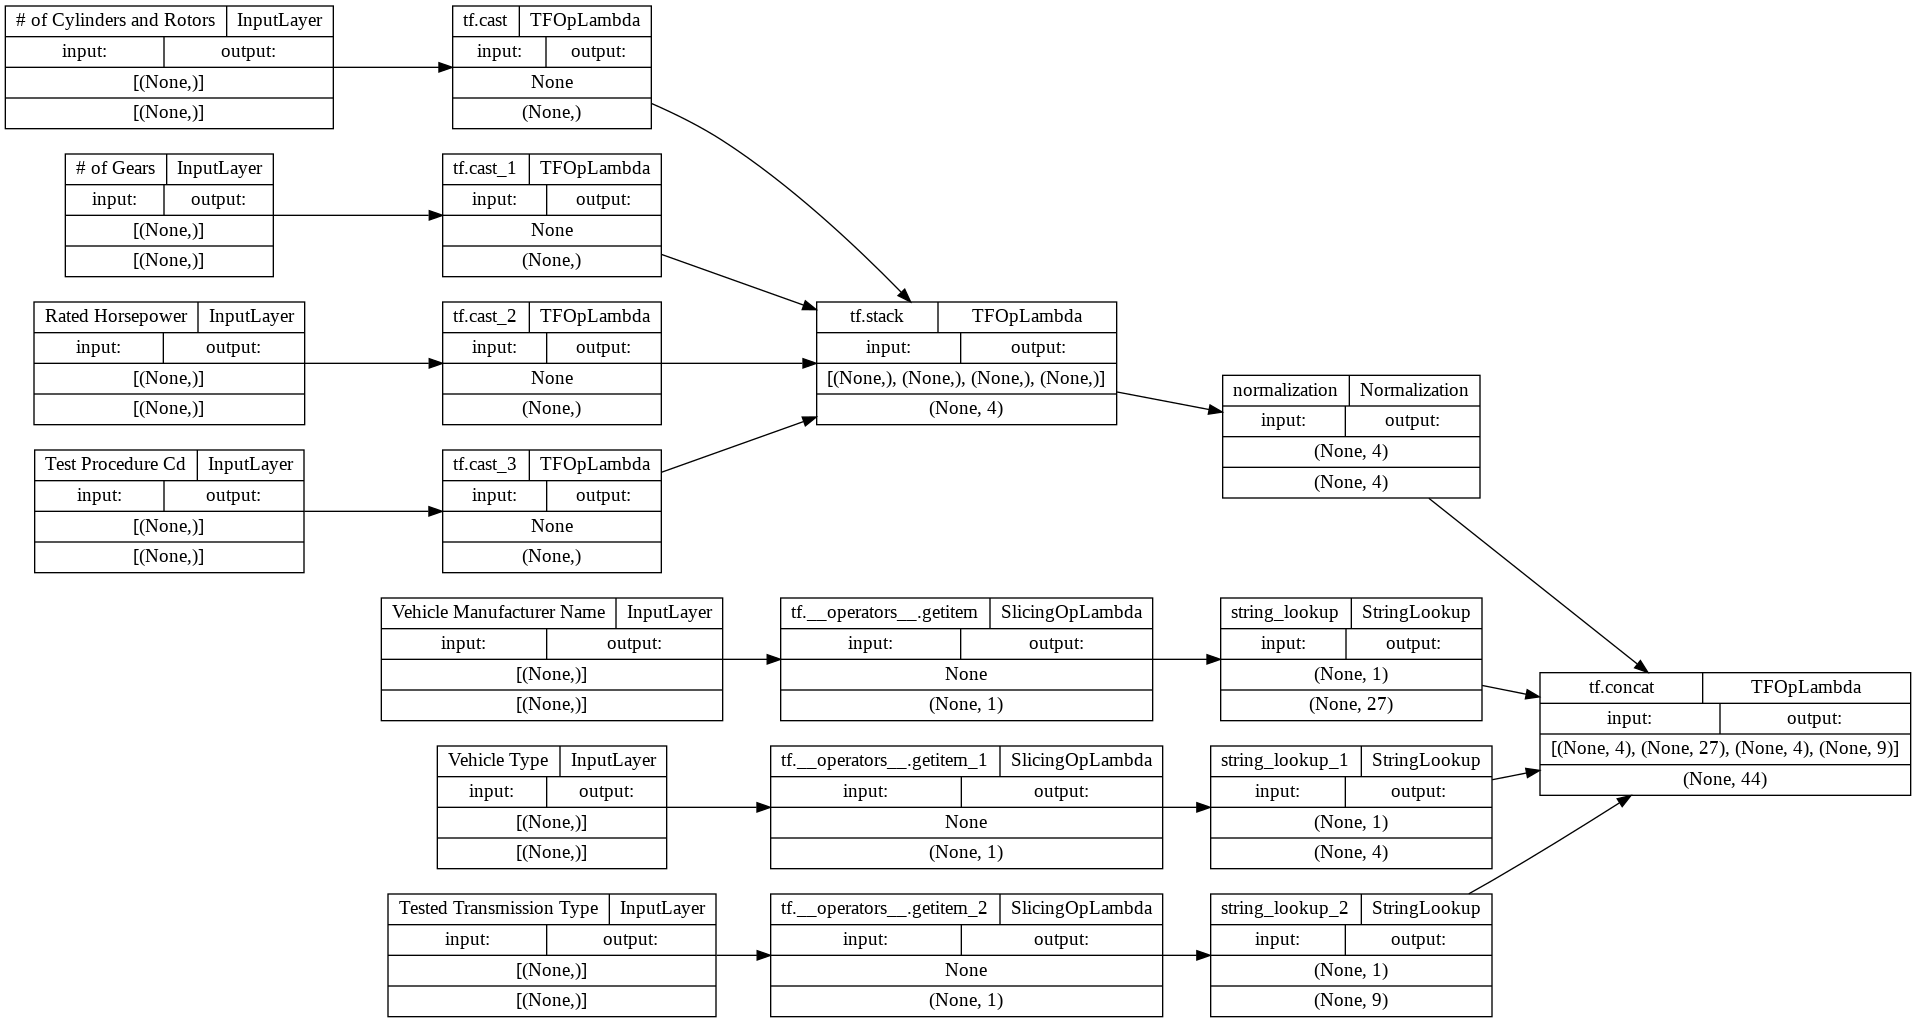

In [ ]:
preprocessor = tf.keras.Model(inputs, preprocessed_result)
tf.keras.utils.plot_model(preprocessor, rankdir="LR", show_shapes=True)

In [ ]:
body = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)
])


In [ ]:
x = preprocessor(inputs)
x

<KerasTensor: shape=(None, 44) dtype=float32 (created by layer 'model')>

In [ ]:
result = body(x)
result

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sequential')>

In [ ]:
model = tf.keras.Model(inputs, result)

model.compile(optimizer='adam',
              loss = 'mean_absolute_error')

In [ ]:
history = model.fit( dict(new_record), target,epochs=5, batch_size = 100)

Epoch 1/5
44/44 [==============================] - 1s 4ms/step - loss: nan
Epoch 2/5
44/44 [==============================] - 0s 5ms/step - loss: nan
Epoch 3/5
44/44 [==============================] - 0s 4ms/step - loss: nan
Epoch 4/5
44/44 [==============================] - 0s 4ms/step - loss: nan
Epoch 5/5
44/44 [==============================] - 0s 4ms/step - loss: nan


In [ ]:
model.summary()